In [2]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv("../../data/processed/tq_data_gridded/df_tot_gridded.csv")

In [19]:
df.head()

,ticker,sip_timestamp,mid_price_log_return
0,ADSK,2024-09-03 13:30:01,-0.00021
1,ADSK,2024-09-03 13:30:02,0.00000
2,ADSK,2024-09-03 13:30:03,0.00000
3,ADSK,2024-09-03 13:30:04,0.00000
4,ADSK,2024-09-03 13:30:05,0.00000


In [20]:
df.describe()

,mid_price_log_return
count,4.444365e+07
mean,-2.730958e-06
std,1.451015e-02
min,-5.730569e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,5.466521e+00


In [21]:
mask = df["mid_price_log_return"].isin([-np.inf, np.inf])
hard_coded_mask = [8326355, 8326356, 8326357, 8326358]
df.loc[hard_coded_mask, :]

,ticker,sip_timestamp,mid_price_log_return
8326355,CLDX,2024-09-25 15:01:10,0.000000
8326356,CLDX,2024-09-25 15:01:11,0.000000
8326357,CLDX,2024-09-25 15:01:12,-0.009635
8326358,CLDX,2024-09-25 15:01:13,0.000000


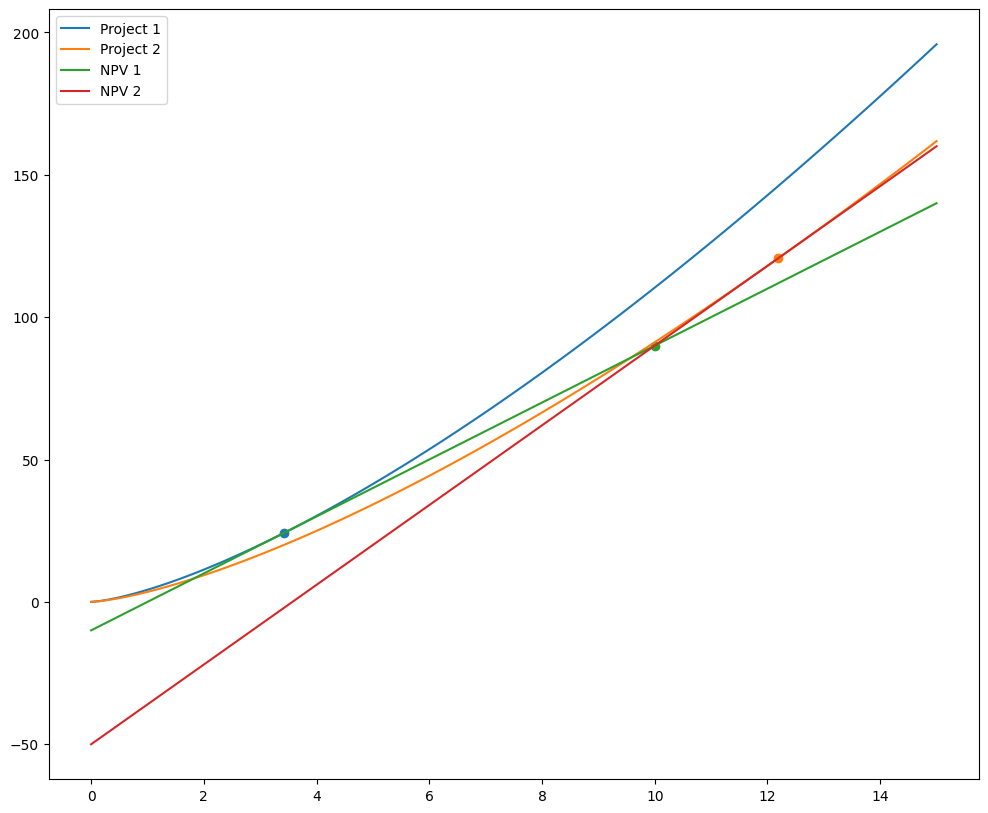

In [49]:
import matplotlib.pyplot as plt

alpha = 0.5
sigma = 1
rho = 1

K1, I1, K2, I2 = 5, 10, 7, 50

beta = (-(alpha-0.5*sigma**2) + np.sqrt((alpha-0.5*sigma**2)**2 + 2*rho*sigma**2) ) / (sigma**2)

p1_star = (beta/(beta-1))*(rho-alpha)*(I1/K1)
p2_star = (beta/(beta-1))*(rho-alpha)*(I2/K2)

A1 = K1/((rho-alpha)*beta)*p1_star**(1-beta)
A2 = K2/((rho-alpha)*beta)*p2_star**(1-beta)

p = np.linspace(0, 15, 100)

F1_p = A1*p**beta
F2_p = A2*p**beta

NPV1 = p*K1/(rho-alpha) - I1
NPV2 = p*K2/(rho-alpha) - I2

p_tilde = (I2-I1)/(K2-K1)*(rho-alpha)

plt.figure(figsize=(12, 10))
plt.plot(p, F1_p, label="Project 1")
plt.plot(p, F2_p, label="Project 2")
plt.plot(p, NPV1, label="NPV 1")
plt.plot(p, NPV2, label="NPV 2")
plt.scatter(p1_star, A1*p1_star**beta)
plt.scatter(p2_star, A2*p2_star**beta)
plt.scatter(p_tilde, p_tilde*K1/(rho-alpha) - I1)
plt.legend()
plt.show()

